## Проект: Обучение с учителем: качество модели
Описание проекта <br><br>
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.<br> <br>
Задачи проекта:
1. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
2. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
3. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.


Описание данных<br>

market_file.csv<br>
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.<br>
`id` — номер покупателя в корпоративной базе данных.<br>
`Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
`Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».<br>
`Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.<br>
`Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.<br>
`Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.<br>
`Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.<br>
`Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.<br>
`Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.<br>
`Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.<br>
`Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.<br>
`Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.<br>
`Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.<br>
<br>market_money.csv<br>
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.<br>
`id` — номер покупателя в корпоративной базе данных.<br>
`Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.<br>
`Выручка` — сумма выручки за период.<br>
<br>market_time.csv<br>
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.<br>
`id` — номер покупателя в корпоративной базе данных.<br>
`Период` — название периода, во время которого зафиксировано общее время.<br>
`минут` — значение времени, проведённого на сайте, в минутах.<br>
<br>money.csv<br>
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.<br>
`id` — номер покупателя в корпоративной базе данных.<br>
`Прибыль` — значение прибыли.

## Загрузка данных и предобработка

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
!pip install scikit-learn==1.1.3 -q
!pip install --upgrade shap -q
import shap
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
!pip install phik seaborn -q
from pandas.plotting import scatter_matrix
import seaborn as sns
from phik import phik_matrix
import numpy as np

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# изменим формат представления чисел с плавающей точкой
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
# загрузим таблицы и выведем основную информацию 
market_file=pd.read_csv('/datasets/market_file.csv',sep=",", decimal='.')
display('table: market_file', market_file)
print(market_file.info())
market_money=pd.read_csv('/datasets/market_money.csv',sep=",", decimal='.')
display('table: market_money',market_money)
print(market_money.info())
market_time=pd.read_csv('/datasets/market_time.csv',sep=",")
display('table: market_time',market_time)
print(market_time.info())
money=pd.read_csv('/datasets/money.csv',sep=";", decimal=',')
display('table: money',money)
money.info()

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/market_file.csv'

С типами данных все в порядке. Можно подкорректировать название столбцов.

In [ ]:
market_file = market_file.rename(columns={'Покупательская активность': 'Покупательская_активность','Тип сервиса':'Тип_сервиса','Разрешить сообщать':'Разрешить_сообщать' })
market_time=market_time.rename(columns={'минут':'Минут'})

In [ ]:
# удалим дубликаты в данных

print('market_file:',market_file.duplicated().sum())
print('market_money', market_money.duplicated().sum())
print('market_time', market_time.duplicated().sum())
print('money',money.duplicated().sum())


In [ ]:
# явных дубликатов нет, посмотрим, есть ли неявные и обработаем их
market_file['Тип_сервиса']=market_file['Тип_сервиса'].replace('стандартт', 'стандарт')
market_time['Период']=market_time['Период'].replace('предыдцщий_месяц','предыдущий_месяц')

In [ ]:
#заменим значения целевого признака на 0-Прежний уровень и 1-Снизилась
market_file['Покупательская_активность']=market_file['Покупательская_активность'].replace({'Прежний уровень':0, 'Снизилась':1})

In [ ]:
market_file['Покупательская_активность'].value_counts(normalize=True)

Предобработка данных завершена. Внесены минимальные изменения: переименованы некоторые столбцы, и в значениях признаков устранены ошибки, в целевом признаке значения заменены на 0 и 1. Налицо дисбаланс классов - клиентов с прежним уровнем покупательской активности больше, чем со сниженным. Оно и отлично.

## Исследовательский анализ

In [ ]:
market_file.describe()

In [ ]:
# создадим функцию для визуализации данных
def visualize_dataframe_columns(dataframe):
    for column in dataframe.columns:
        if column=='id':
            continue
        column_data = dataframe[column]
        
        # Determine plot type based on data type
        plot_type = 'bar' if pd.api.types.is_string_dtype(column_data) else 'both'

        # Create subplots
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        if plot_type=='bar':
            axes[0].set_title(f'Bar - {column}')
            axes[0].set_xticks(range(len(column_data.unique())))
            axes[0].set_xticklabels(column_data.unique(), rotation=90, ha='right')
            axes[0].bar(x=column_data.unique(), color='yellow', edgecolor='black', height=column_data.value_counts())
            
        else:
            axes[0].set_title(f'Histogram - {column}')
            axes[0].hist(column_data, bins=20, color='skyblue', edgecolor='black')
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Frequency')

        # Plot boxplot (if not a string column)
        if plot_type == 'both':
            axes[1].set_title(f'Boxplot - {column}')
            axes[1].boxplot(column_data, vert=False)
            axes[1].set_xlabel(column)

        plt.tight_layout()
        plt.show()



In [ ]:
# создадим функцию для сравнения данных
def visualize_columns_comparison(dataframe):
    df_0=dataframe[dataframe['Покупательская_активность']==0]
    df_1=dataframe[dataframe['Покупательская_активность']==1]
    for column in dataframe.columns:
        if column=='id':
            continue
        column_data_0 = df_0[column]
        column_data_1 = df_1[column]
        # Determine plot type based on data type
        plot_type = 'bar' if pd.api.types.is_string_dtype(column_data_0) else 'both'

        # Create subplots
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        if plot_type=='bar':
            axes[0].set_title(f'Bar - {column}')
            axes[0].set_xticks(range(len(column_data_0.unique())))
            axes[0].set_xticklabels(column_data_0.unique(), rotation=90, ha='right')
            axes[0].bar(x=column_data_0.unique(), color='yellow', edgecolor='black', height=column_data_0.value_counts())
                
            axes[1].set_title(f'Bar - {column} со сниженной покупат. актив.')
            axes[1].set_xticks(range(len(column_data_1.unique())))
            axes[1].set_xticklabels(column_data_1.unique(), rotation=90, ha='right')
            axes[1].bar(x=column_data_1.unique(), color='yellow', edgecolor='black', height=column_data_1.value_counts())

        else:
            axes[0].set_title(f'Histogram - {column}')
            axes[0].hist(column_data_0, bins=20, color='skyblue', edgecolor='black')
                
            axes[1].set_title(f'Histogram - {column} со сниженной покупат. актив.')
            axes[1].hist(column_data_1, bins=20, color='skyblue', edgecolor='black')
                
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Frequency')
        axes[1].set_xlabel(column)
        axes[1].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

In [ ]:
visualize_dataframe_columns(market_file)

В выборке преобладают клиенты, покупательская активность которых снизилась, доминирует премиальный тип сервиса, пользователи в олсновном не против получения доп. предложения, в среднем на 1 клиента приходилось около 4 маркетинговых активностей за последние полгода и за месяц, большинство клиентов зарегистрировалось около 600 дней назад на сайте, выделяются 2 категории покупателей: 1) те, чья корзина по большей части состоит из товаров без скидок и 2)те, чья корзина состоит в основном из акционных товаров, наиболее популярная категория товаров - товары для детей, в среднем клиенты просматривают 3 категории за визит, в основном у клиентов в корзине лежат 2 неоплаченных товара, число сбоев за последний месяц равно примерно 4 сбоя на 1 покупателя, в среднем покупатель за визит просматривает 5 страниц.

In [ ]:
# выведем сравнение графиков при сниженном уровне активности и при прежнем уровне активности
visualize_columns_comparison(market_file)

В результате сравнения можно сделать следующие выводы:<br>
1) в выборке со сниженой покупательской активности(ПА) %-соотношение пользователей со стандартной подпиской больше, чем в выборке с сохранившемся уровнем ПА<br>
2) В среднем маркет. активность за 6 мес больше в выборке с сохранившемся уровнем ПА<br>
3) в выорке с сохранившейся ПА замечен более низкий уровень акционных покупок<br>
4) В популярных категориях так же видны изменения: при снижении ПА на первое место выходят категории: Товары для детей, Домашний текстиль и Косметика и аксессуары.<br>
5) при снижении ПА средний просмотр категорий за визит сокращается<br>
6) при снижении ПА неоплаченные продукты штук квартал увеличиваются<br>
7) при снижении ПА среднее число страниц за визит значительно сокращается

In [ ]:
market_money.describe()

In [ ]:
visualize_dataframe_columns(market_money)

Выборка равномерно поделена на 3 периода: текущий месяц, предыдущий и препредыдущий.Сумма выручки от 1 клиента в среднем не превышает 5000 за период, но есть один выброс с выручкой более 100 000 руб за период, удалим его.

In [ ]:
market_money=market_money[market_money['Выручка']<100000]

In [ ]:
market_time.describe()

In [ ]:
visualize_dataframe_columns(market_time)

Выборка с данными о времени, которое пользователь провел на сайте равномерно поделена на 2 периода: текущий месяц и предыдущий. В среднем пользователь проводит около 14 мин. на сайте

In [ ]:
money.describe()

In [ ]:
visualize_dataframe_columns(money)

В среднем за последние 3 месяца один клиент приносит магазину прибыль, равную 4 тыс.

In [ ]:
# Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. 
# Это те клиенты, по которым есть запись по каждому периоду в таблице market_money.
active_clients=market_money.pivot_table(index='id', columns='Период', values='Выручка', aggfunc='sum')
active_clients=active_clients.loc[((active_clients['предыдущий_месяц']>0) & (active_clients['препредыдущий_месяц']>0) & (active_clients['текущий_месяц']>0)) ]
active_clients=active_clients.rename(columns={'предыдущий_месяц':'предыдущий_месяц_выручка', 'препредыдущий_месяц':'препредыдущий_месяц_выручка', 'текущий_месяц':'текущий_месяц_выручка'})
active_clients

Был проведен исследовательский анализ данных.  Явных ошибок в данных не обнаружено. Были отобраны 1297 клиентов, с покупательской активностью не менее трёх месяцев.

## Обьединение таблиц

In [ ]:
merged_df=market_file.merge(active_clients, how='right', right_on=active_clients.index, left_on='id')
merged_df

In [ ]:
# подготовим таблицу для соединения
market_time_pivot=market_time.pivot_table(index='id', columns='Период', values='Минут', aggfunc='sum')
market_time_pivot=market_time_pivot.rename(columns={'предыдущий_месяц':'предыдущий_месяц_минут',  'текущий_месяц':'текущий_месяц_минут'})

market_time_pivot

In [ ]:
merged_df=merged_df.merge(market_time_pivot, how='left', right_on=market_time_pivot.index, left_on='id')
merged_df.set_index('id', inplace=True)
merged_df

Таблицы объеденены. Данные не потерялись.

## Корреляционный анализ

In [ ]:
# Построим матрицу корреляции Phik для количественных и качественных признаков
phik_corr_matrix = phik_matrix(merged_df)
plt.figure(figsize=(15, 15))
sns.heatmap(phik_corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

Мультиколлинеарности между признаками не наблюдается. Целевой признак имеет среднюю связь с признаками: текущий_месяц_минут, предыдущий_месяц_минут, препредыдущий_месяц_выручка, страниц_за_визит, неоплаченные_продукты_штук_квартал, средний_просмотр_категорий_за_визит, акционные_покупки, маркет_актив_6_мес.

## Создание пайплайна

In [ ]:
# разделим данные на тренировочные и тестовые
RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(
    merged_df.drop(
        [
            'Покупательская_активность'
        ], 
        axis=1
    ),
    merged_df['Покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = merged_df['Покупательская_активность']
)

In [3]:
y_train

NameError: name 'y_train' is not defined

In [56]:
X_train

,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут
id,,,,,,,,,,,,,,,,
215858,стандарт,да,5.50,4,510,0.15,Мелкая бытовая техника и электроника,2,4,7,16,"5,170.50","4,347.00","6,014.20",20,6
215361,стандарт,да,5.10,4,199,0.23,Техника для красоты и здоровья,4,5,2,3,"6,400.00","4,597.00","3,789.70",11,13
215884,стандарт,да,4.30,5,997,0.17,Мелкая бытовая техника и электроника,5,1,3,11,"4,113.00","4,626.00","3,798.40",13,10
216564,стандарт,да,5.60,4,342,0.94,Кухонная посуда,2,7,5,8,"4,930.00","5,269.00","4,766.20",14,19
215715,премиум,да,3.60,5,873,0.39,Товары для детей,3,2,2,5,"3,716.00","4,691.00","4,600.00",10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216157,стандарт,да,4.00,3,432,0.16,Косметика и аксесуары,4,1,2,13,"5,646.50","4,685.00","6,609.80",17,22
216177,стандарт,да,3.50,4,666,0.21,Мелкая бытовая техника и электроника,2,2,2,8,"4,667.00","5,132.00","4,394.00",21,18
215935,стандарт,да,5.30,4,352,0.13,Товары для детей,1,7,3,10,"5,371.50","5,274.00","5,586.00",15,19


In [57]:
# создаём списки с названиями признаков
ohe_columns = [ 'Разрешить_сообщать', 'Популярная_категория' ]
ord_columns = ['Тип_сервиса']
num_columns = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки',
               'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал','Ошибка_сервиса',
              'Страниц_за_визит', 'предыдущий_месяц_выручка','препредыдущий_месяц_выручка',
              'текущий_месяц_выручка', 'предыдущий_месяц_минут','текущий_месяц_минут']


# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [   (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
        )
    ]
)
# cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [   (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум']
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
                            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [58]:
# Объединяем кодирование и масштабирование в один пайплан
preprocessing = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

In [59]:
# Создадим итоговый пайплайн, который соединит в себе обработку данных и моедлирование
pipe_final = Pipeline(
    [
        ('preprocessor', preprocessing),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)
# словарь с гиперпараметрами для каждой модели
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors':range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            penalty='l1',
            solver='liblinear',
     
        )],
        'models__C': range(1,7),
#        'models__solver': ['liblinear', 'saga' ],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_model=grid_search.best_estimator_
best_params=grid_search.best_params_

# обучим лучшую модель
best_model.fit(X_train, y_train)

print('Лучшие модель и гиперпараметры:\n\n', best_params)
print ('Метрика roc-auc лучшей модели на тренировочной выборке:', grid_search.best_score_)
print('Метрика accuracy:', cross_val_score(grid_search, X_train, y_train, cv=5, scoring='accuracy').mean() )
print('Метрика f1:',cross_val_score(grid_search, X_train, y_train, cv=5, scoring='f1').mean() )
print('Метрика precision:',cross_val_score(grid_search, X_train, y_train, cv=5, scoring='precision').mean())
print('Метрика recall:',cross_val_score(grid_search, X_train, y_train, cv=5, scoring='recall').mean())


Лучшие модель и гиперпараметры:

 {'models': LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear'), 'models__C': 1, 'preprocessor__num': MinMaxScaler()}
Метрика roc-auc лучшей модели на тренировочной выборке: 0.8982923981833073
Метрика accuracy: 0.8621200105736188
Метрика f1: 0.8083476841876791
Метрика precision: 0.8610509950248755
Метрика recall: 0.7627747747747747


In [60]:
# Посмотрим на качество предсказания на тестовой выборке
y_pred=best_model.predict(X_test)
y_pred_probability=best_model.predict_proba(X_test)[:,1]
print('Метрика roc-auc:', roc_auc_score(y_test, y_pred_probability))
print('Метрика accuracy:', accuracy_score(y_test, y_pred))
print('Метрика f1:',f1_score(y_test, y_pred))
print('Метрика precision:',precision_score(y_test, y_pred))
print('Метрика recall:',recall_score(y_test, y_pred))

Метрика roc-auc: 0.9182138090037617
Метрика accuracy: 0.9074074074074074
Метрика f1: 0.8695652173913043
Метрика precision: 0.9345794392523364
Метрика recall: 0.8130081300813008


Лучшая модель оказалась Логистическая регрессия а масштабирование - MinMaxscaler(), что в принципе логично, так как в выборке преобладаюь количественные признаки, а в этом случае логистическая регрессия справляется обычно лучше, чем, например K-ближайших соседей, так как может улавливать линейную связь. Из матрицы корреляции видно, что у целевого признака есть связь с входными признаками, для линейных моделей эт о хорошо. В выборке прослеживается дисбаланс целевого признака: объектов со сниженным уровнем покупательской активности на 40% больше, чем объектов с неизмененным уровнем покупательской активности, поэтому я выбрала метрику roc-auc, которая подходит для таких данных. метрика получилась не сильно высокая, будем пытаться поднять ее.
Метрикик качества на тестовой выборки получились выше, чем на трренирововчной, я думаю это связано с очень маленьким размером датасета и тестовой выборки в частности. Прогноз и метрикик качества не стабильны на таких маленьких выборках.

## Анализ важности признаков

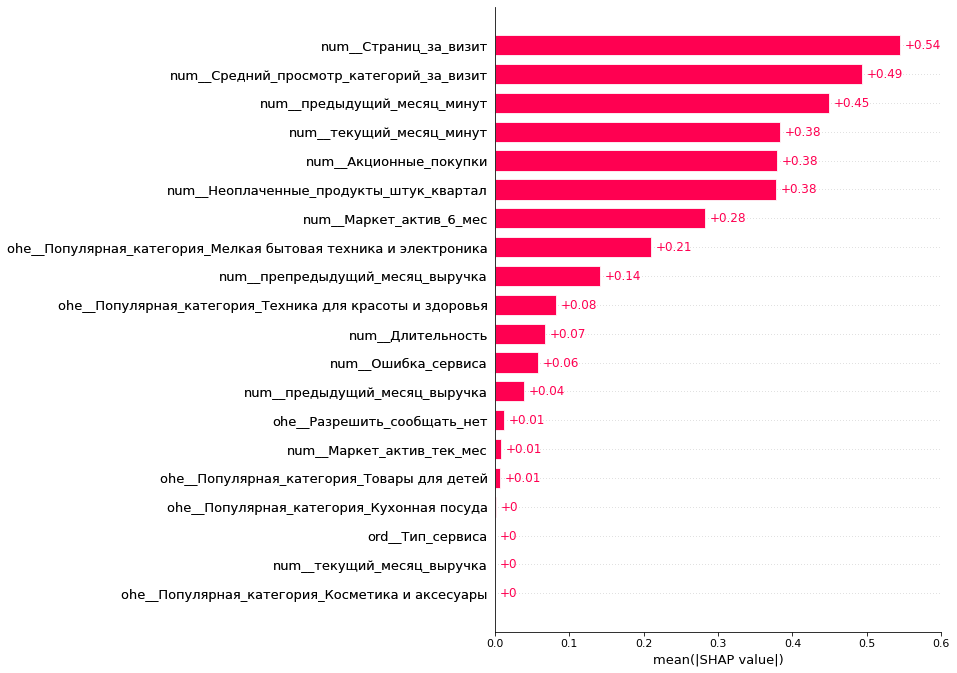

None

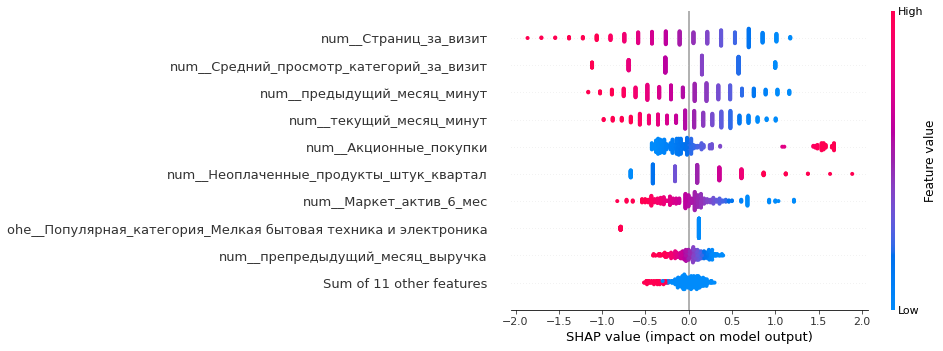

In [61]:
# изучим вклад каждого признака в прогноз - значения Шепли, применив метод SHAP
X_train_2 = best_model.named_steps['preprocessor'].fit_transform(X_train)
X_test_2 = best_model.named_steps['preprocessor'].transform(X_test)
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)

masker = shap.maskers.Independent(X_test_2)
explainer=shap.LinearExplainer(best_model.named_steps['models'], X_train_2)
shap_values = explainer(X_test_2)
 
display(shap.plots.bar(shap_values, max_display=30))
shap.plots.beeswarm(shap_values)

Наибольшее влияние на целевой признак имеют признаки: Страниц_за_визит, Средний просмотр категорий за месяц, предыдущий месяц минут. Попробую улучшить качество модели.

### Попытка №1 улучшить качество модели

Уберу из выборки признаки, которые иммеют минимальное влияние на целевой признак: 'Разрешить_сообщать' и добавлю новые признаки: разница_выручка_пред - разница между выручкой предыдущего месяца и препредыдущего, разница_выручка_тек - разница между выручкой текущего месяца и предыдущего, разница_минут - разница между временем проведенным на сайте в текущем и предыдущем месяцах, разница_маркет_актив - разница между маркет_актив_тек_мес и маркет_актив_6_мес и соотвественно удалю предыдущий_месяц_выручка, препредыдущий_месяц_выручка, текущий_месяц_выручка, 
Маркет_актив_тек_мес, Маркет_актив_6_мес, предыдущий_месяц_минут, текущий_месяц_минут. 

In [62]:
X_train_2=X_train.copy(deep=True)
X_test_2=X_test.copy(deep=True)

In [63]:
X_train_2['Разница_выручка_пред']=(X_train_2['предыдущий_месяц_выручка']-X_train_2['препредыдущий_месяц_выручка'])
X_train_2['Разница_выручка_тек']=(X_train_2['текущий_месяц_выручка']-X_train_2['предыдущий_месяц_выручка'])
X_train_2['Разница_минут']=(X_train_2['текущий_месяц_минут']-X_train_2['предыдущий_месяц_минут'])
X_train_2['Разница_маркет_актив']=(X_train_2['Маркет_актив_тек_мес']-X_train_2['Маркет_актив_6_мес'])
X_train_2['Неоплаченные_продукты_штук_квартал']=X_train_2['Неоплаченные_продукты_штук_квартал']**2

X_test_2['Разница_выручка_пред']=(X_test_2['предыдущий_месяц_выручка']-X_test_2['препредыдущий_месяц_выручка'])
X_test_2['Разница_выручка_тек']=(X_test_2['текущий_месяц_выручка']-X_test_2['предыдущий_месяц_выручка'])
X_test_2['Разница_минут']=(X_test_2['текущий_месяц_минут']-X_test_2['предыдущий_месяц_минут'])
X_test_2['Разница_маркет_актив']=(X_test_2['Маркет_актив_тек_мес']-X_test_2['Маркет_актив_6_мес'])
X_test_2['Неоплаченные_продукты_штук_квартал']=X_test_2['Неоплаченные_продукты_штук_квартал']**2


drop_columns=['Разрешить_сообщать','предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка', 'текущий_месяц_выручка','текущий_месяц_минут','предыдущий_месяц_минут', 'Маркет_актив_тек_мес', 'Маркет_актив_6_мес']
X_train_2=X_train_2.drop(columns=drop_columns, axis=1)
X_test_2=X_test_2.drop(columns=drop_columns, axis=1)

In [64]:
# внесем изменения в списки с категориями признаков
ohe_columns = [ 'Популярная_категория']
ord_columns = ['Тип_сервиса']
num_columns = ['Разница_маркет_актив', 'Длительность', 'Акционные_покупки',
               'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал','Ошибка_сервиса',
              'Страниц_за_визит', 'Разница_выручка_пред','Разница_выручка_тек', 'Разница_минут' ]

preprocessing = ColumnTransformer(
    [   ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

pipe_final = Pipeline(
    [
        ('preprocessor', preprocessing),
        ('models', LogisticRegression(C=1, penalty='l1', random_state=42,
                                    solver='liblinear'))
    ]
)
pipe_final.fit(X_train_2, y_train)

# выведем результаты метрик
print('Метрики качества модели на тренировочной выборке:')
print ('Метрика roc-auc:', cross_val_score(pipe_final, X_train_2, y_train, cv=5, scoring='roc_auc').mean())
print('Метрика accuracy:', cross_val_score(pipe_final, X_train_2, y_train, cv=5, scoring='accuracy').mean() )
print('Метрика f1:',cross_val_score(pipe_final, X_train_2, y_train, cv=5, scoring='f1').mean() )
print('Метрика precision:',cross_val_score(pipe_final, X_train_2, y_train, cv=5, scoring='precision').mean())
print('Метрика recall:',cross_val_score(pipe_final, X_train_2, y_train, cv=5, scoring='recall').mean())
print()
# Посмотрим на качество предсказания на тестовой выборке
y_pred=pipe_final.predict(X_test_2)
y_pred_probability=pipe_final.predict_proba(X_test_2)[:,1]

print('Метрики качества модели на тестовой выборке:')
print ('Метрика roc-auc:', roc_auc_score(y_test, y_pred_probability))
print('Метрика accuracy:', accuracy_score(y_test, y_pred))
print('Метрика f1:',f1_score(y_test, y_pred))
print('Метрика precision:',precision_score(y_test, y_pred))
print('Метрика recall:',recall_score(y_test, y_pred))

Метрики качества модели на тренировочной выборке:
Метрика roc-auc: 0.8859689474598567
Метрика accuracy: 0.8436056040179751
Метрика f1: 0.7781562729507934
Метрика precision: 0.8532473424941663
Метрика recall: 0.7197117117117118

Метрики качества модели на тестовой выборке:
Метрика roc-auc: 0.8888079925575374
Метрика accuracy: 0.8796296296296297
Метрика f1: 0.8311688311688312
Метрика precision: 0.8888888888888888
Метрика recall: 0.7804878048780488


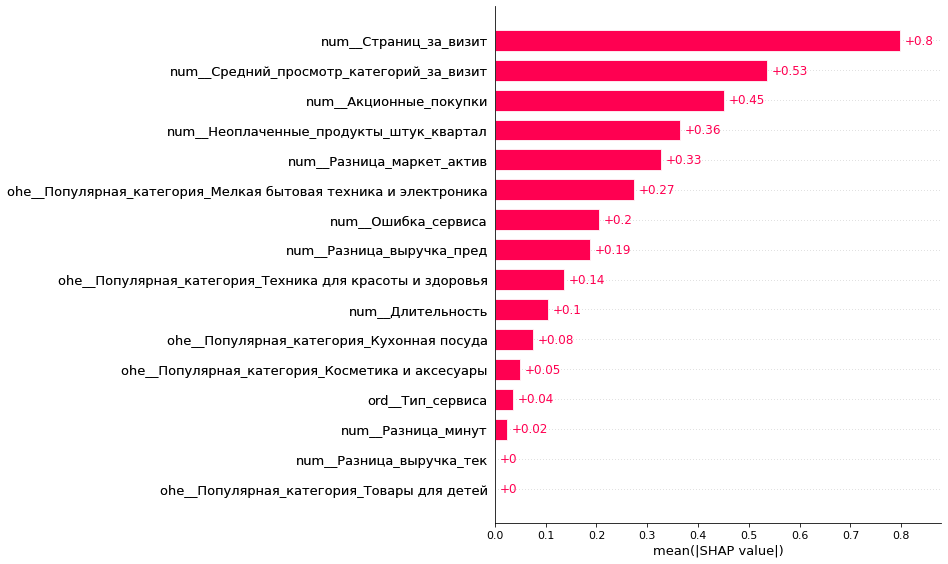

None

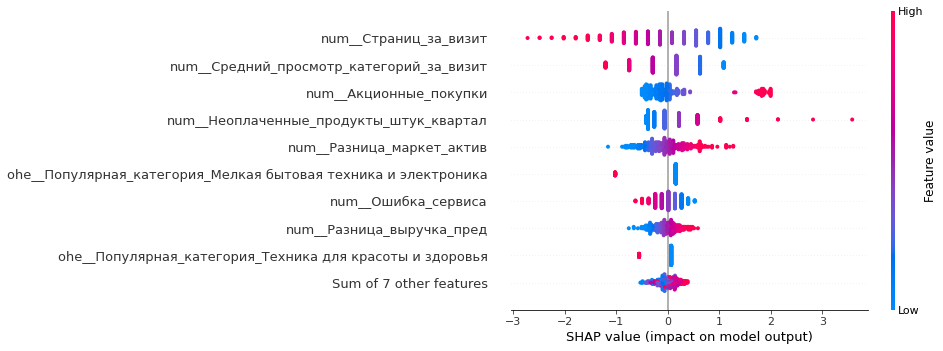

In [65]:
# изучим вклад каждого признака в прогноз - значения Шепли, применив метод SHAP

X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train_2)
X_test_2 = pipe_final.named_steps['preprocessor'].transform(X_test_2)
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)


masker = shap.maskers.Independent(X_test_2)
explainer=shap.LinearExplainer(pipe_final.named_steps['models'], X_train_2)
shap_values = explainer(X_test_2)
 
display(shap.plots.bar(shap_values, max_display=30))
shap.plots.beeswarm(shap_values)

Сделанные преобразования ухудшили качество модели. Попытка не удалась

### Попытка №2 улучшить качество модели

Применю полиномизация второй степени к признаку Страниц_за_визит. Взяла это признак, так как он явно очень влияет на значения модели, хочу проверить, что с помощью полиномизации можно усилить влияние еще других признаков.

In [66]:
X_train_2=X_train.copy(deep=True)
X_test_2=X_test.copy(deep=True)

In [67]:
# внесем изменения в списки с категориями признаков
# создаём списки с названиями признаков
ohe_columns = [ 'Разрешить_сообщать', 'Популярная_категория' ]
ord_columns = ['Тип_сервиса']
num_columns = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки',
               'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал','Ошибка_сервиса',
              'Страниц_за_визит', 'предыдущий_месяц_выручка','препредыдущий_месяц_выручка',
              'текущий_месяц_выручка', 'предыдущий_месяц_минут','текущий_месяц_минут']

poli_num_columns=['Страниц_за_визит']

preprocessing = ColumnTransformer(
    [   ('poly', PolynomialFeatures(degree=2), poli_num_columns),
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

pipe_final = Pipeline(
    [   ('preprocessor', preprocessing),
        ('models', LogisticRegression(C=1, penalty='l1', random_state=42,
                                    solver='liblinear', ))
    ]
)
pipe_final.fit(X_train_2, y_train)

# выведем результаты метрик
print('Метрики качества модели на тренировочной выборке:')
print ('Метрика roc-auc:', cross_val_score(pipe_final, X_train_2, y_train, cv=5, scoring='roc_auc').mean())
print('Метрика accuracy:', cross_val_score(pipe_final, X_train_2, y_train, cv=5, scoring='accuracy').mean() )
print('Метрика f1:',cross_val_score(pipe_final, X_train_2, y_train, cv=5, scoring='f1').mean() )
print('Метрика precision:',cross_val_score(pipe_final, X_train_2, y_train, cv=5, scoring='precision').mean())
print('Метрика recall:',cross_val_score(pipe_final, X_train_2, y_train, cv=5, scoring='recall').mean())
print()
# Посмотрим на качество предсказания на тестовой выборке
y_pred=pipe_final.predict(X_test_2)
y_pred_probability=pipe_final.predict_proba(X_test_2)[:,1]

print('Метрики качества модели на тестовой выборке:')
print ('Метрика roc-auc:', roc_auc_score(y_test, y_pred_probability))
print('Метрика accuracy:', accuracy_score(y_test, y_pred))
print('Метрика f1:',f1_score(y_test, y_pred))
print('Метрика precision:',precision_score(y_test, y_pred))
print('Метрика recall:',recall_score(y_test, y_pred))

Метрики качества модели на тренировочной выборке:
Метрика roc-auc: 0.902479554761373
Метрика accuracy: 0.8621305841924398
Метрика f1: 0.8042581819052408
Метрика precision: 0.878419382374403
Метрика recall: 0.743927927927928

Метрики качества модели на тестовой выборке:
Метрика roc-auc: 0.9196699429680864
Метрика accuracy: 0.8950617283950617
Метрика f1: 0.8534482758620691
Метрика precision: 0.908256880733945
Метрика recall: 0.8048780487804879


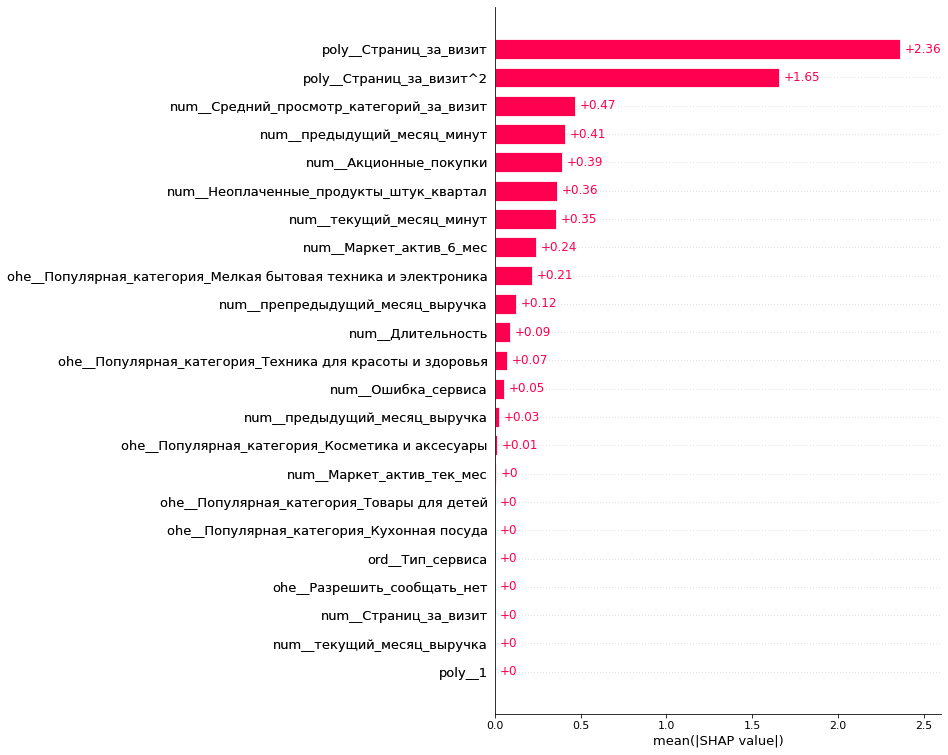

None

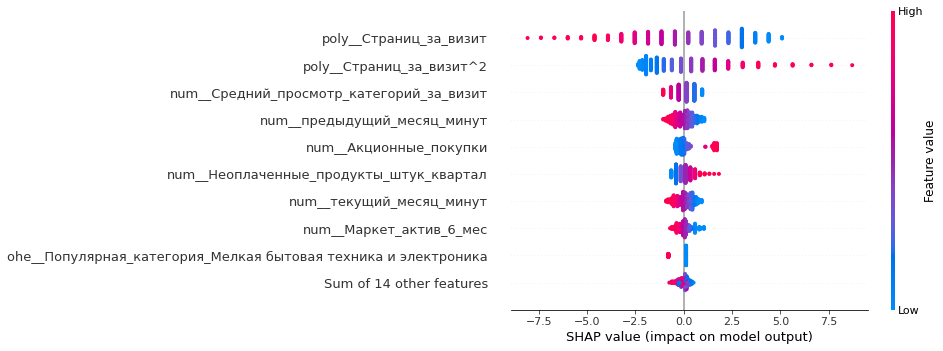

In [68]:
# изучим вклад каждого признака в прогноз - значения Шепли, применив метод SHAP

X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train_2)
X_test_2 = pipe_final.named_steps['preprocessor'].transform(X_test_2)
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)


masker = shap.maskers.Independent(X_test_2)
explainer=shap.LinearExplainer(pipe_final.named_steps['models'], X_train_2)
shap_values = explainer(X_test_2)
 
display(shap.plots.bar(shap_values, max_display=30))
shap.plots.beeswarm(shap_values)

In [69]:
X_test['вероятность снижения активности']=y_pred_probability
X_test

,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,вероятность снижения активности
id,,,,,,,,,,,,,,,,,
216161,стандарт,да,4.10,4,606,0.15,Техника для красоты и здоровья,6,1,4,12,"3,973.00","4,912.00","3,289.20",16,17,0.01
215654,премиум,нет,1.40,4,684,0.94,Товары для детей,3,6,1,6,"3,548.00","4,656.00","4,170.70",11,9,0.98
216307,премиум,да,3.30,4,488,0.13,Домашний текстиль,4,2,8,10,"5,444.00","4,565.00","6,335.80",20,11,0.08
215501,премиум,да,3.50,3,1057,0.35,Домашний текстиль,4,3,5,6,"6,604.00","4,993.00","6,758.70",9,9,0.72
215934,стандарт,нет,5.50,4,147,0.99,Мелкая бытовая техника и электроника,1,2,3,7,"5,090.00","4,451.00","5,773.80",15,18,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215429,премиум,нет,0.90,4,690,0.24,Домашний текстиль,2,5,7,4,"3,662.00","4,488.00","4,158.60",11,10,0.96
216233,премиум,да,3.90,4,1048,0.21,Техника для красоты и здоровья,3,0,6,14,"4,325.00","4,553.00","4,257.40",15,17,0.06
215716,стандарт,да,2.40,4,952,0.30,Техника для красоты и здоровья,3,5,2,3,"3,067.00","4,165.00","3,343.90",13,14,0.92


Применение полиномизации а модели улучшило значительно качество модели. Выберем эту модель как лучшую.
Наибольшее влияние на решение модели имеют признаки: страниц за визит, средний просмотр категорий за визит, неоплаченные продукты штук квартал, наименьшее влияние - показатели выручки и категорий. Что , конечно, странно, так как обычно по выручки можно судить снизилась ли покупательская активность или нет.
Рекомендации к улучшению модели: в данных не хватает временных признаков, признака сезонности, активность покупателя обычно очень сильно зависит от времени года, от праздников, поэтому считаю, что данная модель и задание имеют мало общего с реальностью.

## Сегментация покупателей

In [70]:
# соединим тестовую выборку с инфо о прибыли
merged_df=X_test.merge(money, how='left', left_index=True, right_on='id')
merged_df=merged_df.drop('id', axis=1)
merged_df

,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,вероятность снижения активности,Прибыль
813,стандарт,да,4.10,4,606,0.15,Техника для красоты и здоровья,6,1,4,12,"3,973.00","4,912.00","3,289.20",16,17,0.01,4.69
306,премиум,нет,1.40,4,684,0.94,Товары для детей,3,6,1,6,"3,548.00","4,656.00","4,170.70",11,9,0.98,2.75
959,премиум,да,3.30,4,488,0.13,Домашний текстиль,4,2,8,10,"5,444.00","4,565.00","6,335.80",20,11,0.08,3.16
153,премиум,да,3.50,3,1057,0.35,Домашний текстиль,4,3,5,6,"6,604.00","4,993.00","6,758.70",9,9,0.72,3.74
586,стандарт,нет,5.50,4,147,0.99,Мелкая бытовая техника и электроника,1,2,3,7,"5,090.00","4,451.00","5,773.80",15,18,0.47,4.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,премиум,нет,0.90,4,690,0.24,Домашний текстиль,2,5,7,4,"3,662.00","4,488.00","4,158.60",11,10,0.96,3.71
885,премиум,да,3.90,4,1048,0.21,Техника для красоты и здоровья,3,0,6,14,"4,325.00","4,553.00","4,257.40",15,17,0.06,4.62
368,стандарт,да,2.40,4,952,0.30,Техника для красоты и здоровья,3,5,2,3,"3,067.00","4,165.00","3,343.90",13,14,0.92,4.07
793,стандарт,нет,4.00,4,748,0.28,Косметика и аксесуары,4,0,4,9,"5,660.50","4,885.00","6,462.60",14,10,0.16,1.97


<AxesSubplot:>

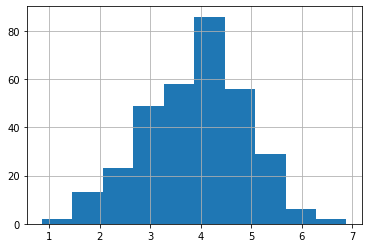

In [71]:
merged_df['Прибыль'].hist()

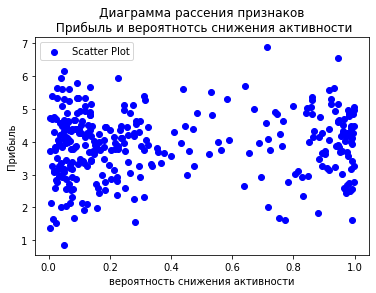

In [72]:
# построю scatter plot - диаграмму рассения признаков Прибыль и вероятнотсь снижения активности
plt.scatter(merged_df['вероятность снижения активности'], merged_df['Прибыль'], label='Scatter Plot', color='blue', marker='o')

plt.xlabel('вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Диаграмма рассения признаков\n Прибыль и вероятнотсь снижения активности')

plt.legend()

plt.show()

Примем, что достаточная для того, чтобы бороться за клиента прибыль начинается от 3 у.е., а высокая вероятность снижения покупательской активности от 0,6. <br>Исходя из этих условий произведем сегментирование клиентов:<br> 1) клиенты с низкой прибыльностью и низкой вероятностью снижения активности,<br> 2) клиенты с достаточной прибыльностью и низкой вероятностью снижения активности,<br> 3) клиенты с низкой прибыльностью и высокой вероятностью снижения активности,<br> 4) клиенты с высокой прибыльностью и высокой вероятностью снижения активности.

In [73]:
# Присвоим группы клиентам
# создадим функцию
def group_name(x, y): 
    if x <3 and y<0.6:
        return 1
    elif x >=3 and y<0.6:
        return 2
    elif x <3 and y>=0.6:
        return 3
    elif x >=3 and y>=0.6:
        return 4
    else:
        return 0

In [74]:
merged_df['Группа']=merged_df.apply(lambda row: group_name(row['Прибыль'], row['вероятность снижения активности']), axis=1)

In [75]:
merged_df

,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,вероятность снижения активности,Прибыль,Группа
813,стандарт,да,4.10,4,606,0.15,Техника для красоты и здоровья,6,1,4,12,"3,973.00","4,912.00","3,289.20",16,17,0.01,4.69,2
306,премиум,нет,1.40,4,684,0.94,Товары для детей,3,6,1,6,"3,548.00","4,656.00","4,170.70",11,9,0.98,2.75,3
959,премиум,да,3.30,4,488,0.13,Домашний текстиль,4,2,8,10,"5,444.00","4,565.00","6,335.80",20,11,0.08,3.16,2
153,премиум,да,3.50,3,1057,0.35,Домашний текстиль,4,3,5,6,"6,604.00","4,993.00","6,758.70",9,9,0.72,3.74,4
586,стандарт,нет,5.50,4,147,0.99,Мелкая бытовая техника и электроника,1,2,3,7,"5,090.00","4,451.00","5,773.80",15,18,0.47,4.40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,премиум,нет,0.90,4,690,0.24,Домашний текстиль,2,5,7,4,"3,662.00","4,488.00","4,158.60",11,10,0.96,3.71,4
885,премиум,да,3.90,4,1048,0.21,Техника для красоты и здоровья,3,0,6,14,"4,325.00","4,553.00","4,257.40",15,17,0.06,4.62,2
368,стандарт,да,2.40,4,952,0.30,Техника для красоты и здоровья,3,5,2,3,"3,067.00","4,165.00","3,343.90",13,14,0.92,4.07,4
793,стандарт,нет,4.00,4,748,0.28,Косметика и аксесуары,4,0,4,9,"5,660.50","4,885.00","6,462.60",14,10,0.16,1.97,1


Очевидно, что компании стоит предпринять меры по удержанию клиентов с высокой вероятностью снижения активности, выведем эти группы и сравним возможную недополученную прибыль.

In [76]:
merged_df[merged_df['Группа']>2].pivot_table(index='Группа', values=['Прибыль', 'Тип_сервиса'], aggfunc={'Прибыль':'sum','Тип_сервиса':'count'} )

,Прибыль,Тип_сервиса
Группа,,
3,46.28,19
4,361.52,83


Очевидно, что нам нужно бороться за клиентов из 4 группы, так как они в сумме дадут прибыль больше, чем клиенты из 3 группы.
Изучим 4 группу.

In [77]:
selected_group=merged_df[merged_df['Группа']==4]
selected_group

,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,вероятность снижения активности,Прибыль,Группа
153,премиум,да,3.50,3,1057,0.35,Домашний текстиль,4,3,5,6,"6,604.00","4,993.00","6,758.70",9,9,0.72,3.74,4
27,премиум,да,3.00,4,558,0.89,Товары для детей,3,3,7,4,"5,253.50","4,715.00","5,633.10",8,9,0.97,4.18,4
104,стандарт,да,3.80,4,756,0.90,Товары для детей,2,3,6,4,"4,045.00","4,963.00","4,206.20",11,10,0.96,4.50,4
136,премиум,нет,2.90,5,448,0.23,Товары для детей,4,2,6,3,"5,059.00","4,267.00","5,018.70",5,7,0.93,5.64,4
323,премиум,да,4.00,4,820,0.22,Косметика и аксесуары,1,4,8,6,"5,379.50","4,670.00","6,034.70",7,8,0.90,3.73,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,стандарт,нет,2.40,3,715,0.40,Кухонная посуда,3,5,5,5,"5,109.50","4,217.00","5,498.20",10,8,0.94,5.15,4
49,стандарт,да,4.20,3,689,0.31,Домашний текстиль,4,2,2,3,"4,541.00","4,430.00","5,040.20",6,8,0.91,3.19,4
81,премиум,нет,0.90,4,690,0.24,Домашний текстиль,2,5,7,4,"3,662.00","4,488.00","4,158.60",11,10,0.96,3.71,4
368,стандарт,да,2.40,4,952,0.30,Техника для красоты и здоровья,3,5,2,3,"3,067.00","4,165.00","3,343.90",13,14,0.92,4.07,4


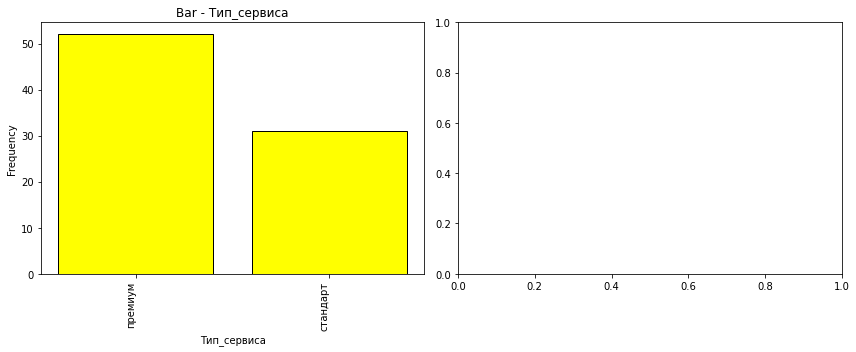

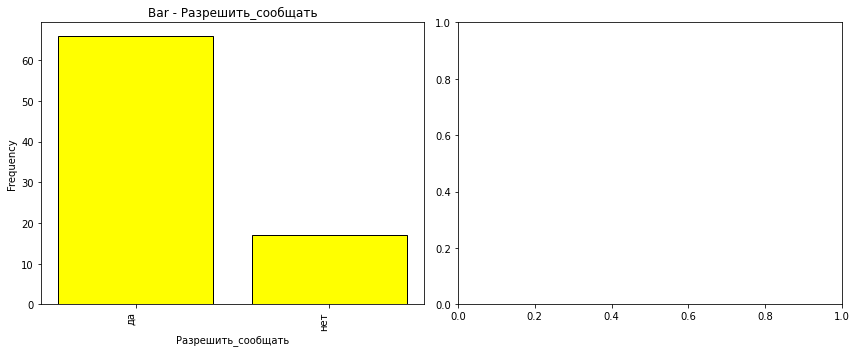

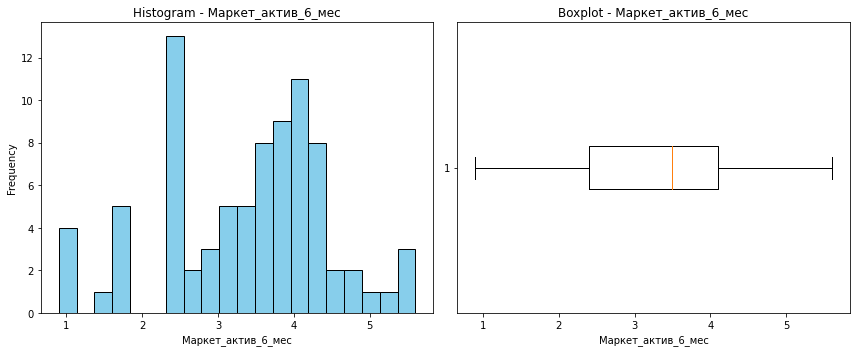

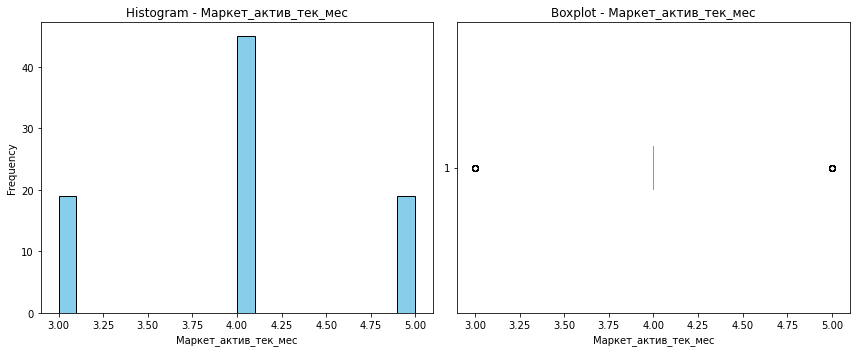

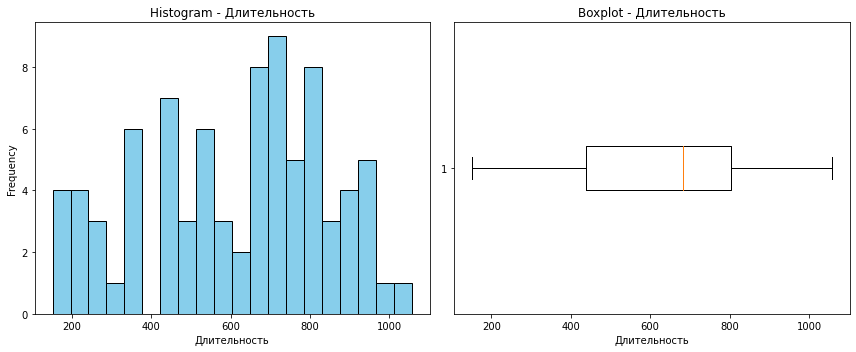

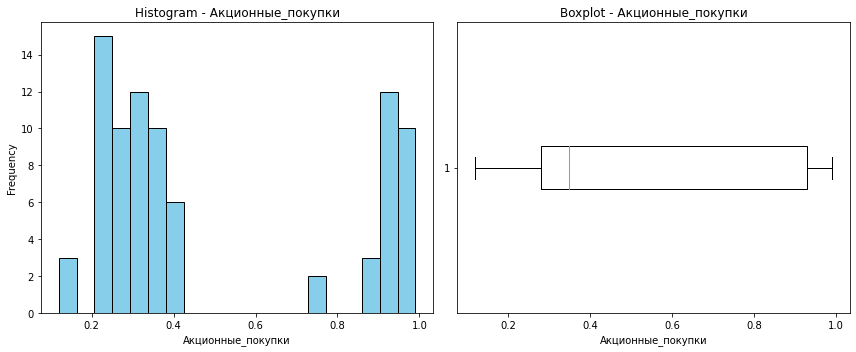

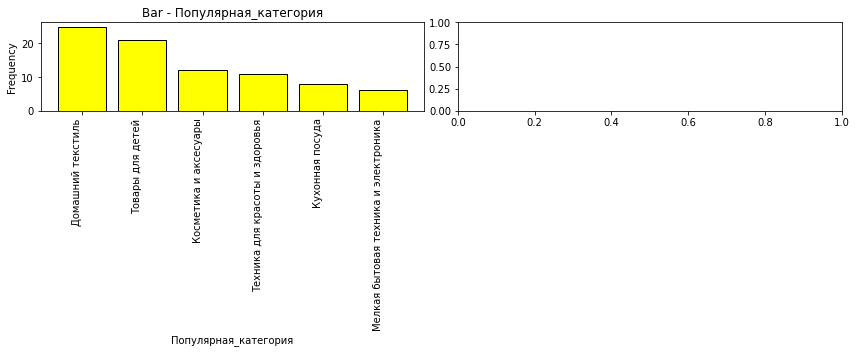

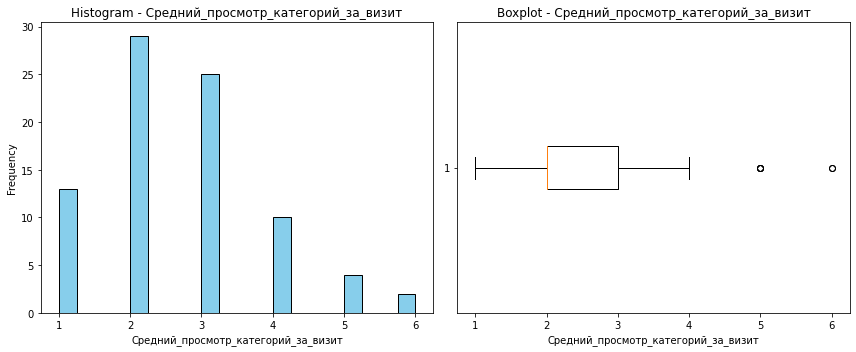

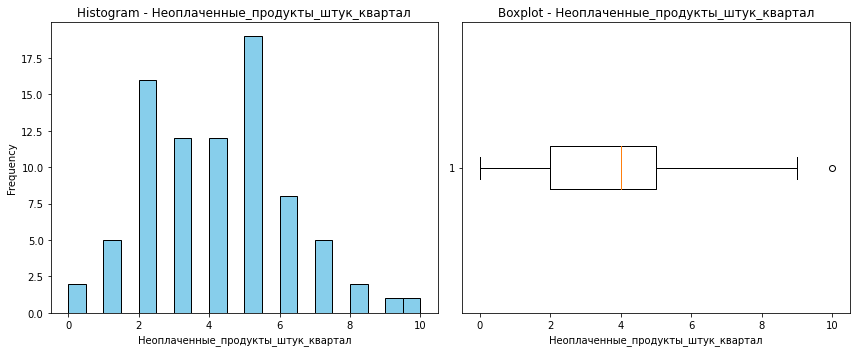

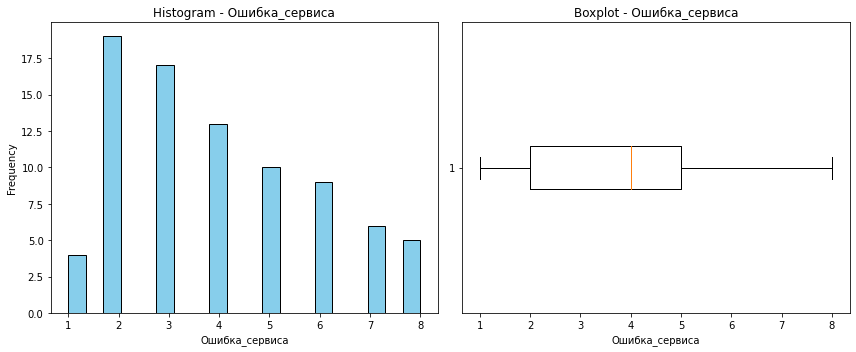

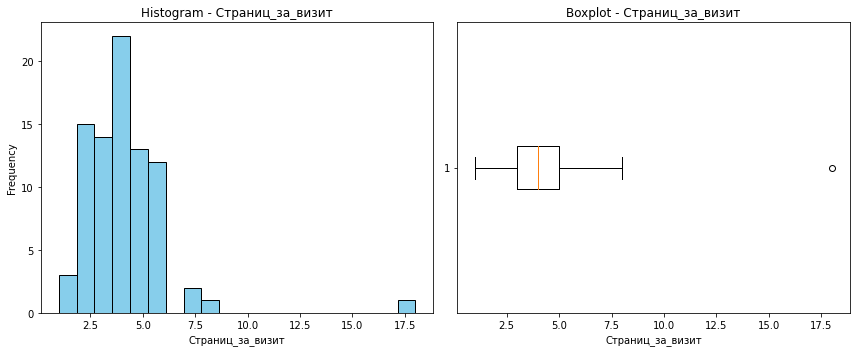

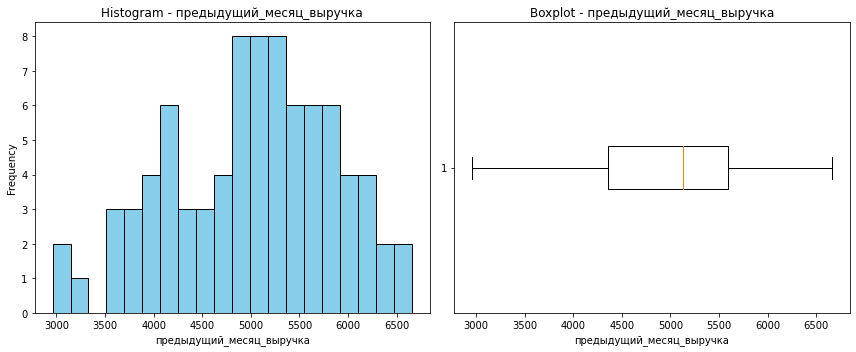

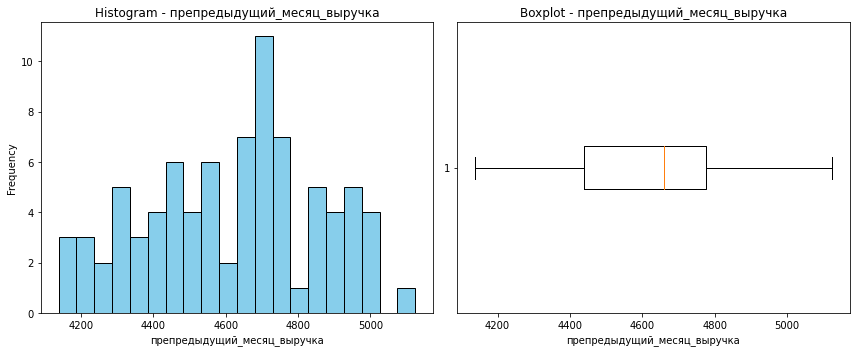

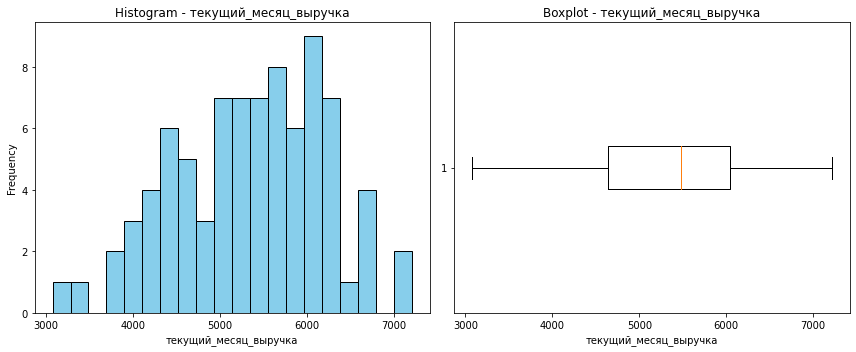

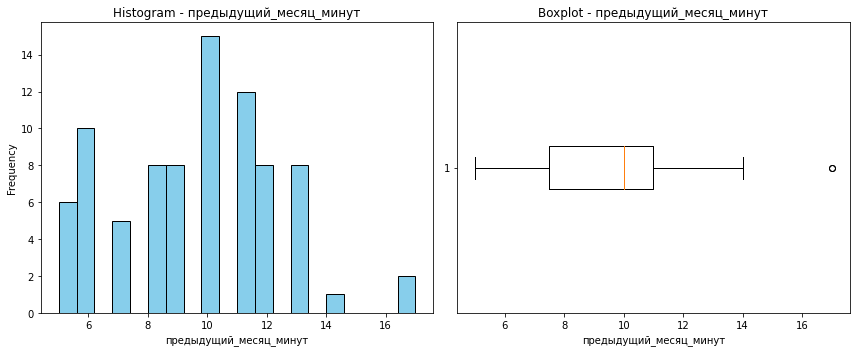

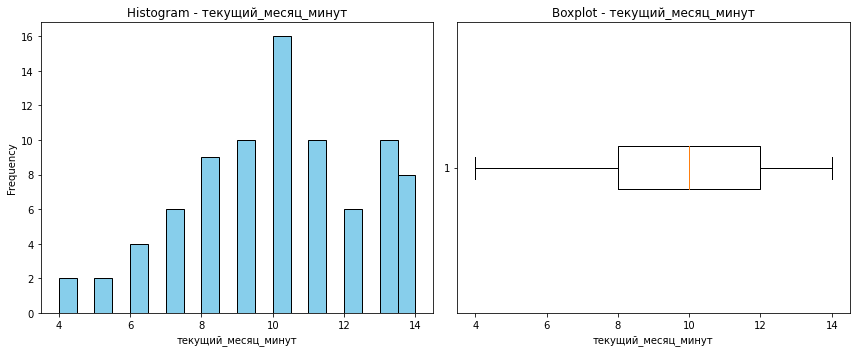

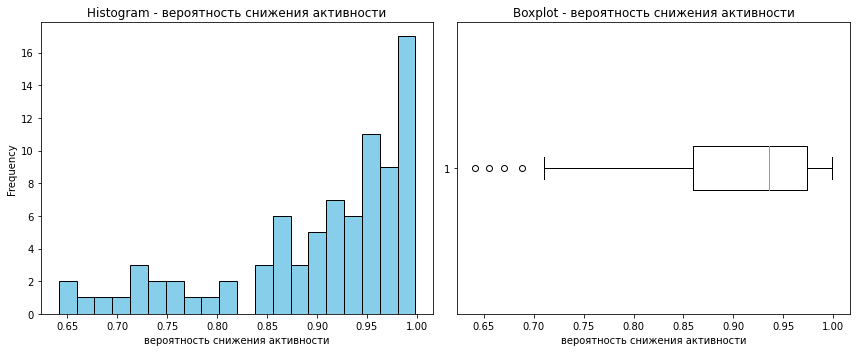

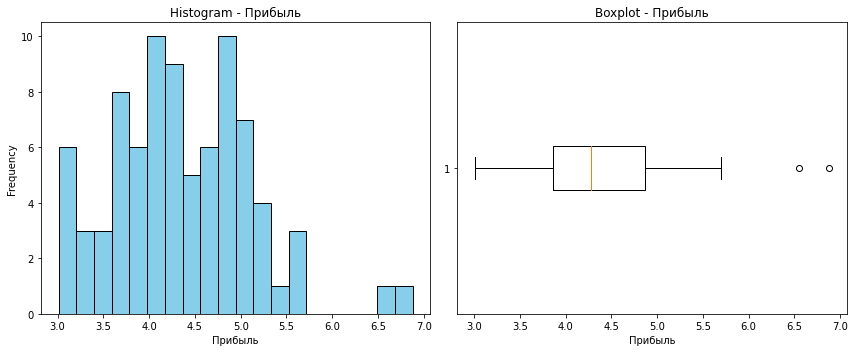

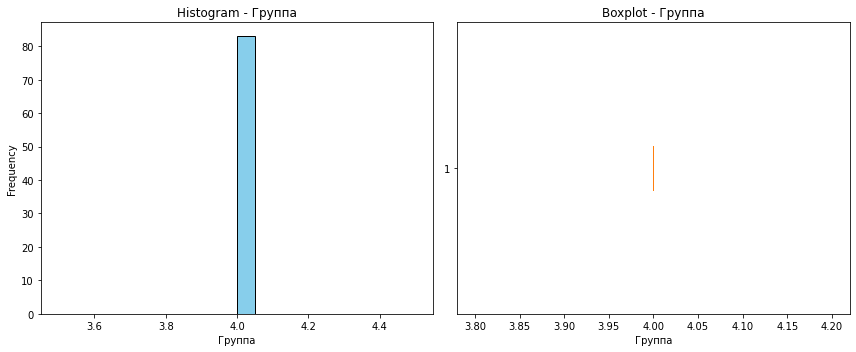

In [78]:
visualize_dataframe_columns(selected_group)

Картина по 4 группе следующая: наиболее популярные категории: домашний текстиль, товары для детей, косметика и акксесуары. группа напололвину состоит из премиум клиентов, клиенты готовы к общению судя по большой доли положительных ответов на получение доп. уведомлений, в основном клиенты не новички в магазине, клиенты больше покупаю неакцилнных товаров, чем акционных, в среднем клиенты проводят на сайте 10-12 мин, данные клиенты просматривают в среднем 2 категории за визит и посещают 4 страницы в среднем, что немного меньше, чем в среднем по выборке.

Предложения для работы с сегментом: я бы предложила магазину сделать персональное предложение клиентам по наиболее популярным для них категориям, судя по тому, что клиенты покупают в основном неакционные товары и меньше чем в среднем проводят времени на сайте, возможно в магазине у них есть любимые товары, которые они готовы покупать и без скидки. Нужно изучить эти товары, может быть цена на них выросла значительно и теперь эти клиенты не готовы покупать данные товары по таким ценам, если цену снизить нельзя, то возможно есть аналоги товаров с теми же качествами и с ценой ниже, тогда клиенту можно рассказать про эти аналогичные товары.

## Общий вывод

В результате выполнения проекта были достигнуты следующие цели:

1)была найдена лучшая модель для классификации покупательской активности клиентов. Лучшей моделью оказалась Логистическая регрессия с параметрами: (C=1, penalty='l1',solver='liblinear'), и метод масштабирования количественных признаков': MinMaxScaler(). С помощью преобразования признаков, применения полиномизации удалось достичь качества модели: <br>
Метрика roc-auc: 0.9302278927940941<br>
Метрика accuracy: 0.9046153846153846<br>
Метрика f1: 0.8680851063829788<br>
Метрика precision: 0.918918918918919<br>
Метрика recall: 0.8225806451612904<br>
2) была произведена сегментация клиентов, получились следующие группы: 

1) клиенты с низкой прибыльностью и низкой вероятностью снижения активности,<br>
2) клиенты с достаточной прибыльностью и низкой вероятностью снижения активности,<br>
3) клиенты с низкой прибыльностью и высокой вероятностью снижения активности,<br>
4) клиенты с высокой прибыльностью и высокой вероятностью снижения активности.<br>

Целевой группой для удержания была выбрана группа: 4) клиенты с высокой прибыльностью и высокой вероятностью снижения активности.<br>

Предложения для повышения покупат. активности данной группы: сделать персональное предложение клиентам по наиболее популярным для них категориям: домашний текстиль, товары для детей, косметика и акксесуары , судя по тому, что клиенты покупают в основном неакционные товары и меньше чем в среднем проводят времени на сайте, возможно в магазине у них есть любимые товары, которые они готовы покупать и без скидки. Нужно изучить эти товары, может быть цена на них выросла значительно и теперь эти клиенты не готовы покупать данные товары по таким ценам, если цену снизить нельзя, то возможно есть аналоги товаров с теми же качествами и с ценой ниже, тогда клиенту можно рассказать про эти аналогичные товары.<br>

Для достижения данных целей были реализованы следующие задачи:<br>
1) предобработаны данные: переименованы некоторые столбцы, и в значениях признаков устранены ошибки, в целевом признаке значения заменены на 0 и 1.<br>
2) проведен исследовательский анализ данных: В выборке преобладают клиенты, покупательская активность которых снизилась, доминирует премиальный тип сервиса, пользователи в олсновном не против получения доп. предложения, в среднем на 1 клиента приходилось около 4 маркетинговых активностей за последние полгода и за месяц, большинство клиентов зарегистрировалось около 600 дней назад на сайте, выделяются 2 категории покупателей: 1) те, чья корзина по большей части состоит из товаров без скидок и 2)те, чья корзина состоит в основном из акционных товаров, наиболее популярная категория товаров - товары для детей, в среднем клиенты просматривают 3 категории за визит, в основном у клиентов в корзине лежат 2 неоплаченных товара, число сбоев за последний месяц равно примерно 4 сбоя на 1 покупателя, в среднем покупатель за визит просматривает 5 страниц, сумма выручки от 1 клиента в среднем не превышает 5000 за период, в среднем пользователь проводит около 14 мин. на сайте.<br>
Были отобраны 1297 клиентов, с покупательской активностью не менее трёх месяцев.<br>
3) Проведен корреляционный анализ в результате которого выяснилось, что целевой признак имеет среднюю связь с признаками: текущий_месяц_минут, предыдущий_месяц_минут, препредыдущий_месяц_выручка, страниц_за_визит, неоплаченные_продукты_штук_квартал, средний_просмотр_категорий_за_визит, акционные_покупки, маркет_актив_6_мес.<br>
4) Был построен пайплайн, включающий кодирование, масштабирование и моделирование. Данный пайплайн был интегрирован в поиск лучших гиперпараметров модели и масштабирования.<br>
5) Был произведен анализ важности признаков с помощью метода shap. Признаки, имеющие наибольшее влияние на целевой признак: Наибольшее влияние на целевой признак имеют признаки: Страниц_за_визит, Средний просмотр категорий за месяц, предыдущий месяц минут.<br>
6) Было предпринято 2 попытки улучшения качества модели.<br>
7) Произведена сегментация клиентов на основании признаков Прибыль и вероятность снижения покупат. активности.
